In [11]:
from scipy.fft import fft, ifft
import numpy as np

x = [1,2,3]

y = [0.9,2.1,3]

xf = fft(x)
yf = fft(y)

In [ ]:
diff  = np.array(x)-np.array(y)

In [ ]:
accuracy = np.sqrt(np.mean(diff**2))

In [ ]:
accuracy

In [ ]:
xf

In [ ]:
yf

In [ ]:
accuracy_real = np.sqrt(np.mean((np.real(yf-xf))**2))

In [ ]:
accuracy_real

In [ ]:
accuracy_imag = np.sqrt(np.mean((np.imag(yf-xf))**2))

In [ ]:
accuracy_imag

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['ifft', 'fft', 'diff', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


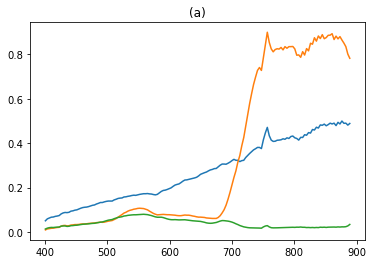

In [20]:
%pylab inline
from pysptools import abundance_maps
import random
import pandas as pd
import urllib
import itertools
from scipy.io import loadmat
from scipy.signal import convolve2d

dataset = "samson"

d = loadmat("../input/reference-datasets/" + dataset + "/" + dataset + ".mat")
em = loadmat("../input/reference-datasets/" + dataset + "/endmembers/endmembers.mat")
dinfo = pd.read_csv("../input/reference-datasets/" + dataset + "/info.csv",header=None,index_col=None,names=["parameter",'value','unit'])

nrow = int(dinfo[dinfo['parameter'] == 'nrow'].value.values[0])
ncol = int(dinfo[dinfo['parameter'] == 'ncol'].value.values[0])

nbands = int(dinfo[dinfo['parameter'] == 'nbands'].value.values[0])
spec_start = dinfo[dinfo['parameter'] == 'spec_start'].value.values[0]
spec_end = dinfo[dinfo['parameter'] == 'spec_end'].value.values[0]

data = d['Y']
data = data / data.max()
try:
    spec_bands = d['SlectBands'].flatten()
except:
    spec_bands = arange(0,nbands)

# Define wavelength array
wavelength = linspace(spec_start,spec_end,nbands)
wavelength = wavelength[spec_bands]

if len(em['M']) > len(wavelength):
    endmembers = em['M'][spec_bands]
else:
    endmembers = em['M']

endmembers = endmembers.reshape(len(wavelength),-1)

a_map = em["A"].reshape((endmembers.shape[1],nrow,ncol)).T

hypercube = data.copy()
spectra = endmembers.T
hypercube = hypercube.reshape(len(wavelength), a_map.shape[1], a_map.shape[0]).T

# it is found the endmembers' spectra are normalised to 1, which is not the real spectra
# for the original spectra, see paper:
# Zhu, 2017, Hyperspectral Unmixing: Ground Truth Labeling, Datasets, Benchmark Performances and Survey.
spectra[0] = spectra[0] * 0.5
spectra[1] = spectra[1] * 0.9
spectra[2] = spectra[2] * 0.08

figure(1)
plot(wavelength, spectra[0])
plot(wavelength, spectra[1])
plot(wavelength, spectra[2])
title('(a)')

Figure(2)

plt.show()




Text(0.5, 1.0, 'Rock a_map')

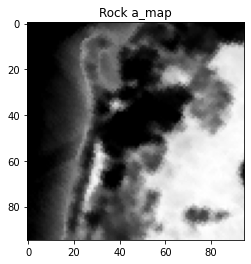

In [26]:
imshow(a_map[:,:,0],cmap=cm.gray)
title('Rock a_map')

In [2]:
def create_sythentic_hypercube(a_map, spectra, wavelength):
 
    '''
    Encodes a 2d image with spectral data to generate a synthetic hypercube.
    
    Inputs:
        a_map (N x M x L array) - 3D abundance map of target. Each channel in L corresponds to the
             abundance (between 0 and 1) of the spectral signature in the spectra array. 
             
        spectra (L x Q array) - Array of 1D spectral respones for each pixel. Number of array members
            should be equal to the maximum value in im (L). Q is sample points in wavelength space.
            
        wavelength (1 x Q array) - Array describing the wavelength value corresponding to the spectral
            response arrays.
    
    Output:
        hypercube (N X M x Q) - 3D synthetic hypercube.
        
        wavelength (1 x Q array) - Array describing the wavelength value corresponding to the spectral
            dimension of the hypercube.
    '''

    N,M,_ = a_map.shape
    L,Q = spectra.shape

    hypercube = zeros((N,M,Q))
    
    for i in range(L):
        hypercube += outer(a_map[:,:,i],spectra[i]).reshape((N,M,Q))

    return hypercube, wavelength

In [3]:
hypercube_noiseless,wavelength = create_sythentic_hypercube(a_map, spectra, wavelength)

In [4]:
hypercube_noiseless.shape


(95, 95, 156)

Text(0.5, 1.0, '(a)')

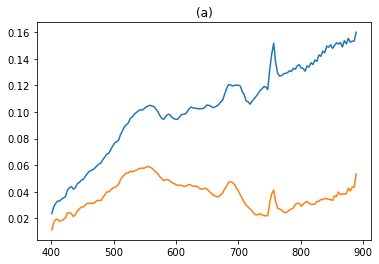

In [19]:
plot(wavelength,hypercube_noiseless[20,20,:])
plot(wavelength,hypercube[20,20,:])
title('(a)')

In [6]:
xx = hypercube_noiseless[20,20,:].tolist()
yy = hypercube[20,20,:].tolist()

In [7]:
type(xx)

list

In [8]:
diff  = np.array(xx)-np.array(yy)
accuracy = np.sqrt(np.mean(diff**2))

In [9]:
accuracy

0.07346896152981831

In [12]:
X_f = fft(xx)
Y_f = fft(yy)

In [13]:
diff_real = np.real(X_f - Y_f)
diff_imag = np.imag(X_f - Y_f)
accuracy_real = np.sqrt(np.mean(diff_real**2))
accuracy_imag = np.sqrt(np.mean(diff_imag**2))

In [14]:
accuracy_real

0.8232543263624389

In [15]:
accuracy_imag

0.40532911345675

Text(0.5, 1.0, '(b)')

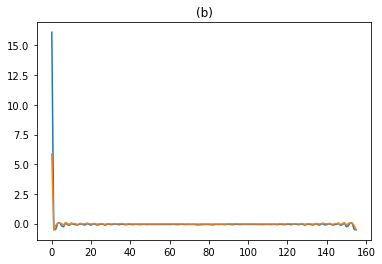

In [17]:
plot(np.real(X_f))
plot(np.real(Y_f))
title('(b)')

Text(0.5, 1.0, '(c)')

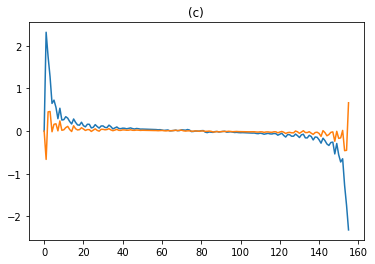

In [18]:
plot(np.imag(X_f))
plot(np.imag(Y_f))
title('(c)')